# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete SVM using cvxopt
2. You may create new cells for discussions or visualizations


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

     pcost       dcost       gap    pres   dres
 0:  8.7483e-01  3.5428e+01  1e+02  2e+00  3e+01
 1:  8.4879e+00 -3.2104e+00  4e+01  6e-01  9e+00
 2:  1.6650e+01  1.1151e+01  1e+01  1e-01  2e+00
 3:  2.1484e+01  1.6526e+01  6e+00  4e-02  5e-01
 4:  2.1785e+01  2.0581e+01  2e+00  9e-03  1e-01
 5:  2.1870e+01  2.1694e+01  2e-01  2e-04  3e-03
 6:  2.1867e+01  2.1801e+01  7e-02  5e-05  7e-04
 7:  2.1861e+01  2.1860e+01  1e-03  8e-07  1e-05
 8:  2.1861e+01  2.1861e+01  1e-05  8e-09  1e-07
 9:  2.1861e+01  2.1861e+01  1e-07  8e-11  1e-09
Optimal solution found.


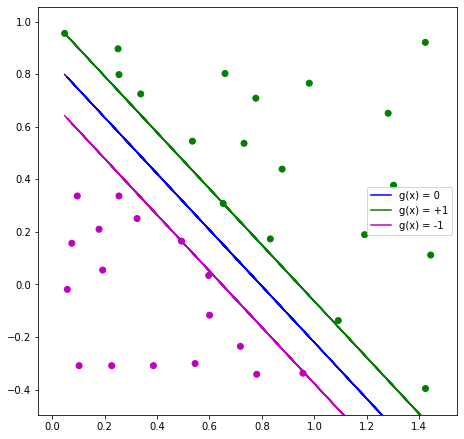

In [2]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

""" Assign color per label, then scatter plot dataset """
pred_color = {1:'g', -1:'m'}
colors = [pred_color[i] for i in y]
plt.figure(figsize = (7.5, 7.5))
plt.scatter(x[:, 0], x[:, 1], c=colors)

""" Modifying y to work with NumPy broadcasting,
concatenating a stack of ones onto x for bias term """
y = y[:, np.newaxis]
x = np.hstack((x, np.ones_like(y)))

""" Quadratic programming """
Q = matrix([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0]], tc='d')
p = matrix([0, 0, 0], tc='d')
G = matrix(-y * x, tc='d')
h = matrix(-1*np.ones_like(y), tc='d')
sol = solvers.qp(Q, p, G, h)
w1, w2, b = sol['x'][0], sol['x'][1], sol['x'][2]

""" Plot boundary and margin boundaries """
plt.plot(x[:, 0], (-w1*x[:, 0]-b)/w2, c='b', label='g(x) = 0')
plt.plot(x[:, 0], (-w1*x[:, 0]-b+1)/w2, c='g', label='g(x) = +1')
plt.plot(x[:, 0], (-w1*x[:, 0]-b-1)/w2, c='m', label='g(x) = -1')
plt.xlim((x[:, 0].min()-0.1, x[:, 0].max()+0.1))
plt.ylim((x[:, 1].min()-0.1, x[:, 1].max()+0.1))
plt.legend()
plt.show()

## b): Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0:  1.2369e+00  3.9714e+01  6e+02  2e+00  7e+02
 1:  1.0368e+01 -1.5829e+01  3e+01  8e-02  2e+01
 2:  6.1832e+00  7.5736e-02  6e+00  1e-02  3e+00
 3:  2.6957e+00  1.9060e+00  8e-01  1e-03  3e-01
 4:  2.3622e+00  2.1461e+00  2e-01  3e-04  8e-02
 5:  2.3003e+00  2.2049e+00  1e-01  7e-05  2e-02
 6:  2.2686e+00  2.2290e+00  4e-02  2e-05  6e-03
 7:  2.2515e+00  2.2425e+00  9e-03  3e-06  7e-04
 8:  2.2470e+00  2.2462e+00  8e-04  1e-07  3e-05
 9:  2.2466e+00  2.2466e+00  9e-06  1e-09  3e-07
10:  2.2466e+00  2.2466e+00  9e-08  1e-11  3e-09
Optimal solution found.


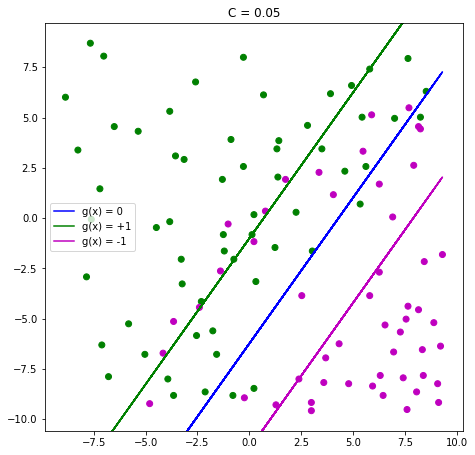

In [27]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

""" Assign color per label, then scatter plot dataset """
pred_color = {1:'g', -1:'m'}
colors = [pred_color[i] for i in y]
plt.figure(figsize = (7.5, 7.5))
plt.scatter(x[:, 0], x[:, 1], c=colors)

""" Modifying y to work with NumPy broadcasting,
concatenating a stack of ones onto x for bias term """
y = y[:, np.newaxis]
x = np.hstack((x, np.ones_like(y)))

""" Quadratic programming """
Q = np.zeros((len(y)+3, len(y)+3))
Q[0:2, 0:2] = 0.5*np.eye(2)
Q = matrix(Q, tc='d')

C = 0.05
p = C*np.ones(len(y))[np.newaxis, :]
p = matrix(np.hstack((np.zeros((1, 3)), p)).T, tc='d')

G = np.block([[-y*x, -1*np.eye(len(y))],
              [np.zeros((len(y), 3)), -1*np.eye(len(y))]])
G = matrix(G, tc='d')

h = matrix(np.vstack((-1*np.ones_like(y), np.zeros_like(y))), tc='d')

sol = solvers.qp(Q, p, G, h)
w1, w2, b = sol['x'][0], sol['x'][1], sol['x'][2]

""" Plot boundary and margin boundaries """
plt.plot(x[:, 0], (-w1*x[:, 0]-b)/w2, c='b', label='g(x) = 0')
plt.plot(x[:, 0], (-w1*x[:, 0]-b+1)/w2, c='g', label='g(x) = +1')
plt.plot(x[:, 0], (-w1*x[:, 0]-b-1)/w2, c='m', label='g(x) = -1')
plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
plt.title("C = {}".format(C))
plt.legend()
plt.show()

## c):  Output 4 plots & Explain your observations here:

     pcost       dcost       gap    pres   dres
 0:  2.0586e+00  5.0520e+01  7e+02  3e+00  6e+02
 1:  1.9677e+01 -2.3176e+01  5e+01  1e-01  3e+01
 2:  1.1129e+01  1.0321e+00  1e+01  2e-02  4e+00
 3:  5.1180e+00  3.8916e+00  1e+00  2e-03  5e-01
 4:  4.6561e+00  4.2742e+00  4e-01  5e-04  1e-01
 5:  4.5701e+00  4.3758e+00  2e-01  2e-04  5e-02
 6:  4.5183e+00  4.4169e+00  1e-01  6e-05  2e-02
 7:  4.4859e+00  4.4444e+00  4e-02  2e-05  6e-03
 8:  4.4679e+00  4.4615e+00  6e-03  8e-07  2e-04
 9:  4.4647e+00  4.4644e+00  3e-04  3e-08  8e-06
10:  4.4645e+00  4.4645e+00  3e-06  3e-10  9e-08
Optimal solution found.


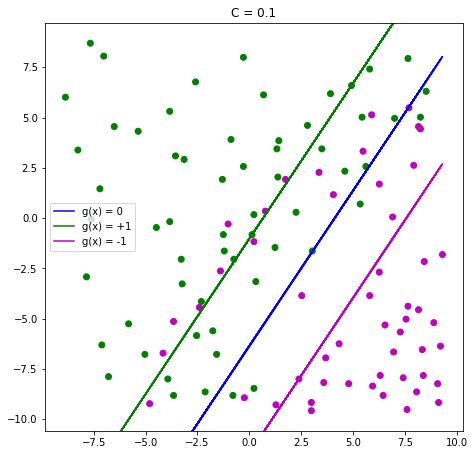

     pcost       dcost       gap    pres   dres
 0: -5.3462e+01  2.5872e+02  1e+03  4e+00  7e+01
 1:  1.3078e+02 -3.0840e+01  2e+02  5e-01  8e+00
 2:  5.6284e+01  3.4499e+01  2e+01  3e-02  5e-01
 3:  4.9731e+01  4.0109e+01  1e+01  1e-02  2e-01
 4:  4.6211e+01  4.2662e+01  4e+00  4e-03  7e-02
 5:  4.5260e+01  4.3579e+01  2e+00  1e-03  2e-02
 6:  4.4780e+01  4.4030e+01  8e-01  5e-04  8e-03
 7:  4.4567e+01  4.4205e+01  4e-01  2e-04  3e-03
 8:  4.4427e+01  4.4336e+01  9e-02  4e-05  6e-04
 9:  4.4408e+01  4.4349e+01  6e-02  2e-05  3e-04
10:  4.4385e+01  4.4371e+01  1e-02  4e-16  8e-14
11:  4.4378e+01  4.4377e+01  2e-04  4e-16  1e-12
12:  4.4377e+01  4.4377e+01  2e-06  4e-16  3e-13
Optimal solution found.


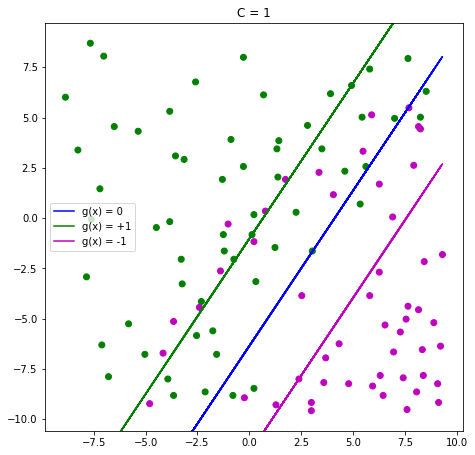

     pcost       dcost       gap    pres   dres
 0: -8.1948e+05  4.6956e+05  2e+06  2e+02  2e+01
 1:  1.4936e+05 -6.1257e+03  2e+05  4e+00  3e-01
 2:  7.9786e+03  2.6759e+03  6e+03  1e-01  8e-03
 3:  5.3173e+03  3.5802e+03  2e+03  3e-02  2e-03
 4:  5.1659e+03  3.8326e+03  1e+03  2e-02  1e-03
 5:  4.7745e+03  4.1018e+03  7e+02  8e-03  6e-04
 6:  4.6479e+03  4.2535e+03  4e+02  4e-03  3e-04
 7:  4.4923e+03  4.3953e+03  1e+02  2e-04  2e-05
 8:  4.4686e+03  4.4071e+03  6e+01  7e-05  5e-06
 9:  4.4355e+03  4.4342e+03  1e+00  9e-07  7e-08
10:  4.4348e+03  4.4347e+03  5e-02  3e-08  3e-09
11:  4.4348e+03  4.4348e+03  8e-04  4e-10  4e-11
Optimal solution found.


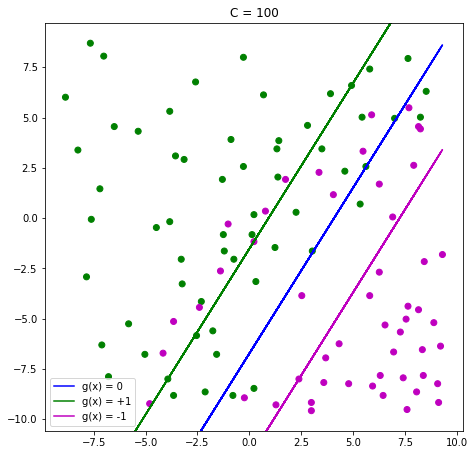

     pcost       dcost       gap    pres   dres
 0: -8.2235e+13  4.5105e+13  2e+14  2e+06  2e+01
 1:  1.4250e+13 -6.9400e+11  2e+13  3e+04  2e-01
 2:  2.4964e+11 -1.7815e+08  3e+11  4e+02  3e-03
 3:  2.5672e+09  2.6019e+07  3e+09  4e+00  3e-05
 4:  9.4700e+07  2.6383e+07  8e+07  1e-01  8e-07
 5:  5.5257e+07  3.4069e+07  2e+07  3e-02  2e-07
 6:  5.2212e+07  3.7734e+07  2e+07  2e-02  1e-07
 7:  4.8927e+07  4.0549e+07  9e+06  7e-03  5e-08
 8:  4.6421e+07  4.2681e+07  4e+06  2e-03  2e-08
 9:  4.4985e+07  4.3923e+07  1e+06  7e-05  5e-10
10:  4.4770e+07  4.4021e+07  8e+05  3e-05  2e-10
11:  4.4415e+07  4.4293e+07  1e+05  5e-06  4e-11
12:  4.4349e+07  4.4346e+07  3e+03  1e-07  8e-13
13:  4.4347e+07  4.4347e+07  2e+02  6e-09  2e-12
14:  4.4347e+07  4.4347e+07  2e+00  6e-11  2e-12
Optimal solution found.


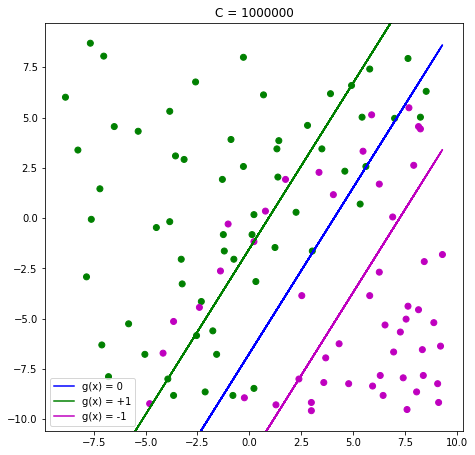

In [26]:
C = [0.1, 1, 100, 1000000]
for i in range(len(C)):
    plt.figure(i, figsize = (7.5, 7.5))
    plt.title("C = {}".format(C[i]))
    p = C[i]*np.ones(len(y))[np.newaxis, :]
    p = matrix(np.hstack((np.zeros((1, 3)), p)).T, tc='d')
    
    sol = solvers.qp(Q, p, G, h)
    w1, w2, b = sol['x'][0], sol['x'][1], sol['x'][2]
    
    plt.scatter(x[:, 0], x[:, 1], c=colors)
    plt.plot(x[:, 0], (-w1*x[:, 0]-b)/w2, c='b', label='g(x) = 0')
    plt.plot(x[:, 0], (-w1*x[:, 0]-b+1)/w2, c='g', label='g(x) = +1')
    plt.plot(x[:, 0], (-w1*x[:, 0]-b-1)/w2, c='m', label='g(x) = -1')
    plt.xlim((x[:, 0].min()-1, x[:, 0].max()+1))
    plt.ylim((x[:, 1].min()-1, x[:, 1].max()+1))
    plt.legend()
    plt.show()